In [94]:
a =[0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,1]
for i in range(8):
    a.append(0)
crc8 = [1,1,1,0,1,0,1,0,1]

for i in range(0,208):
    if a[i]:
        for j in range(0,9):
            a[i+j] ^= crc8[j];

for i in range(208,216):
    print(a[i],end='')

00000000

In [1]:
a=107355857 
b=596064 
c= 2145237128
print(a*a/(b*c))

9.013288839696008


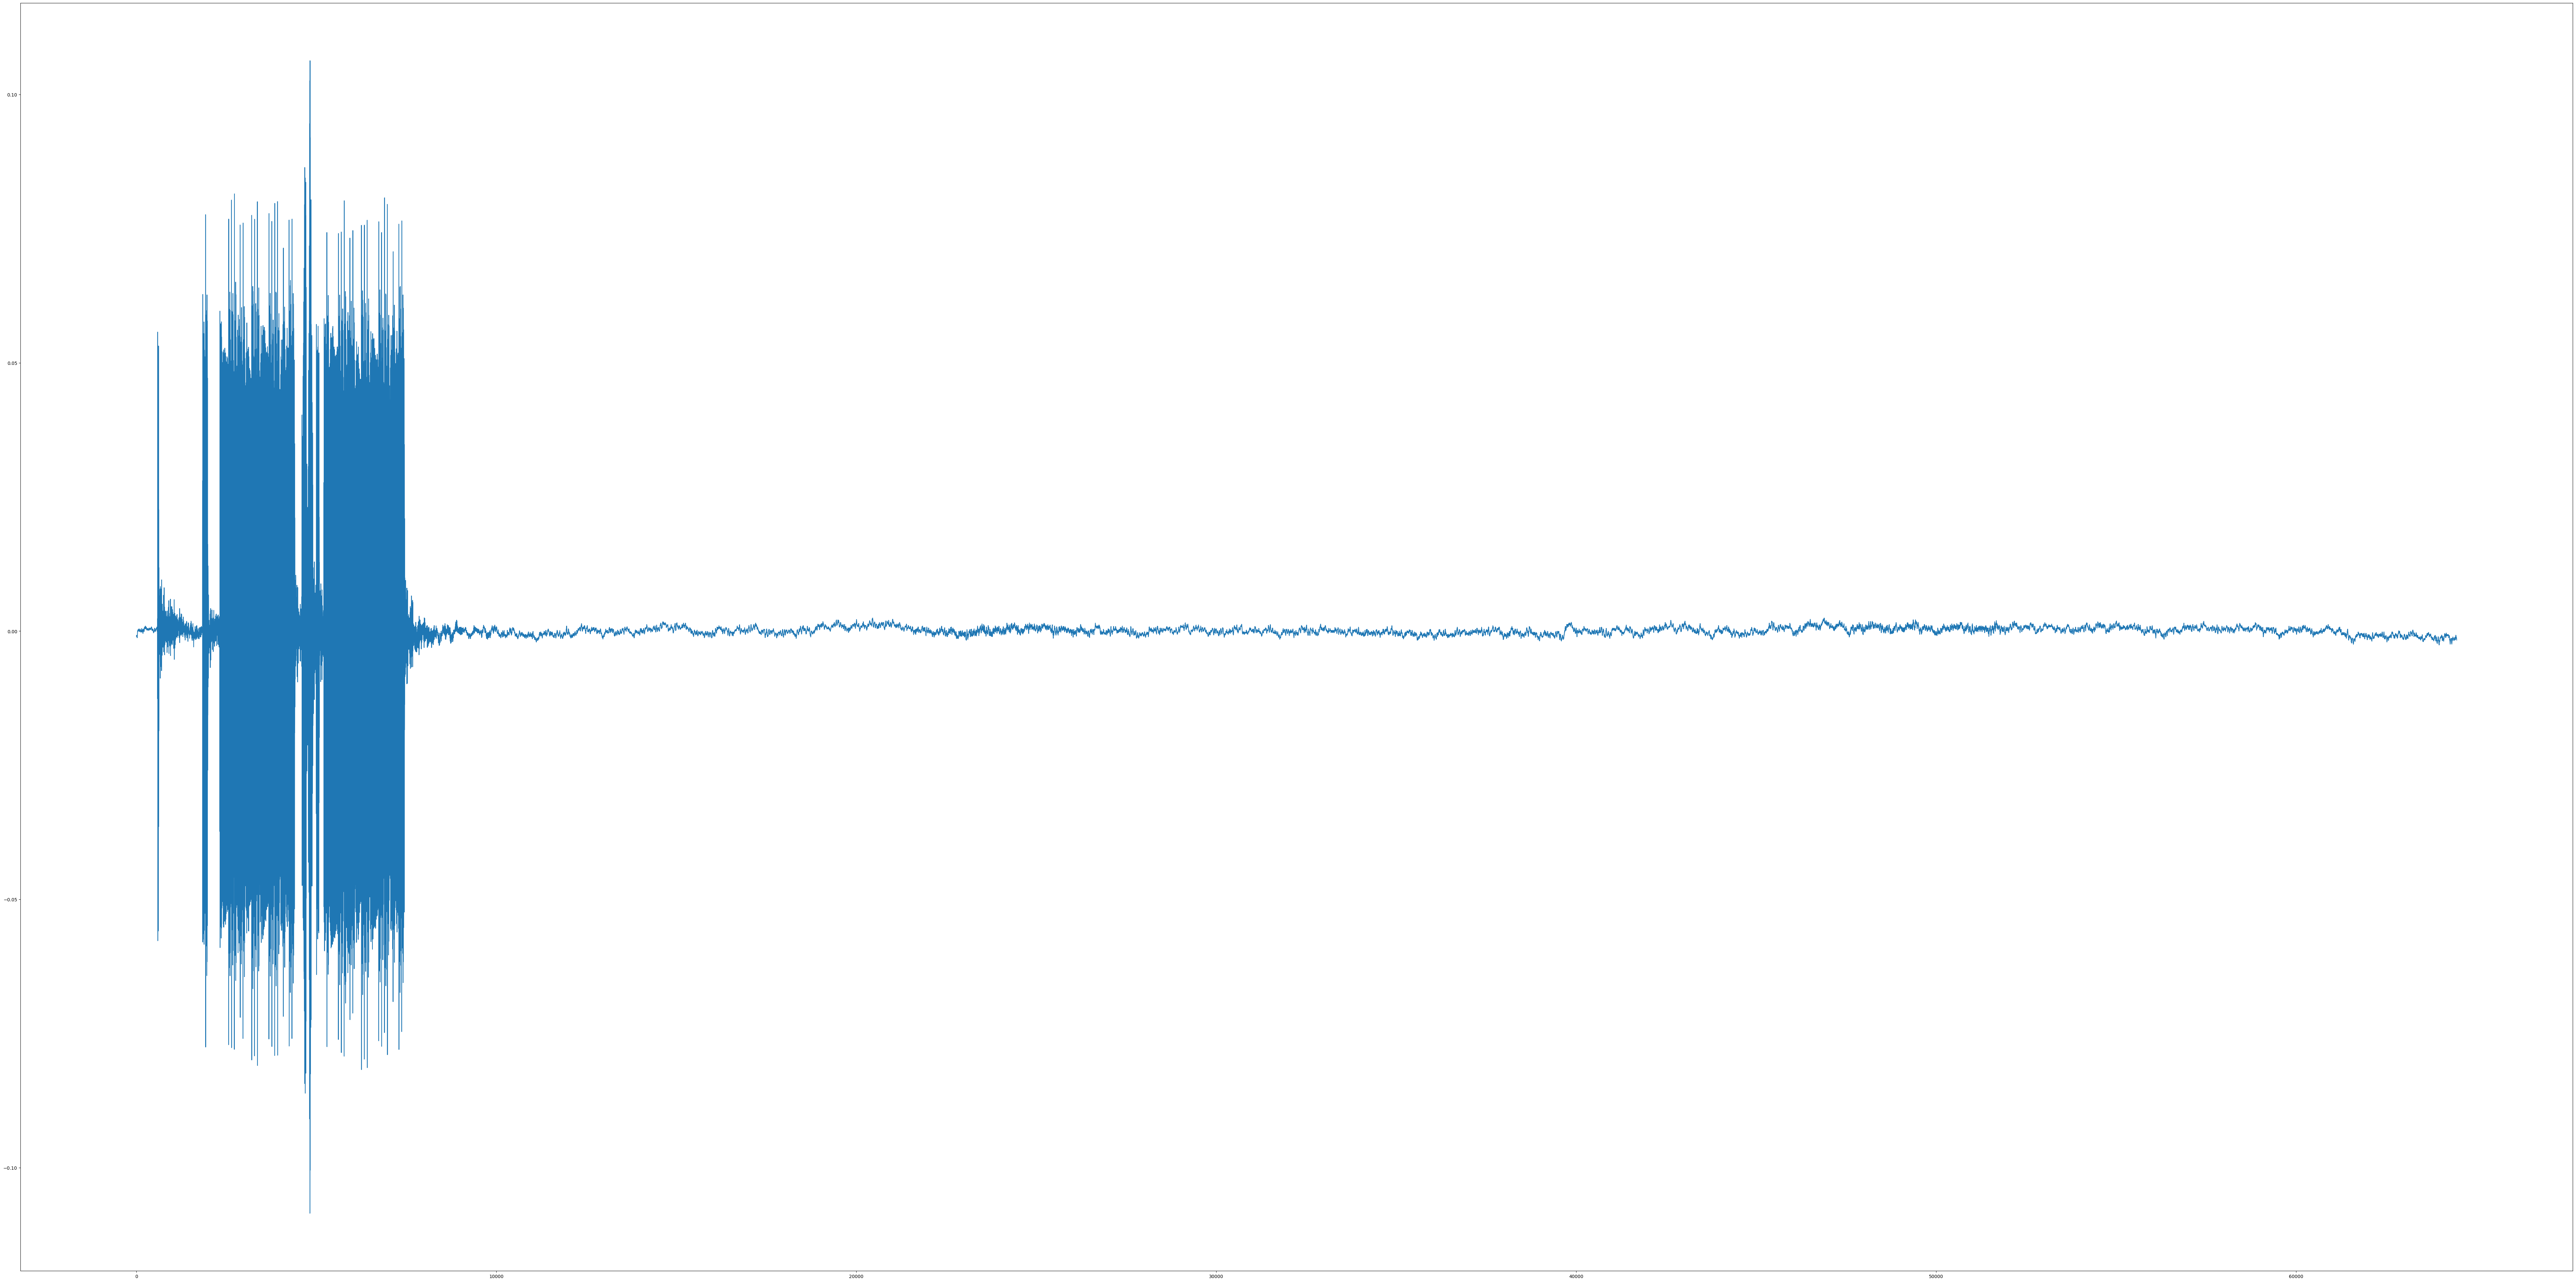

[4596]
0.010010757897810266


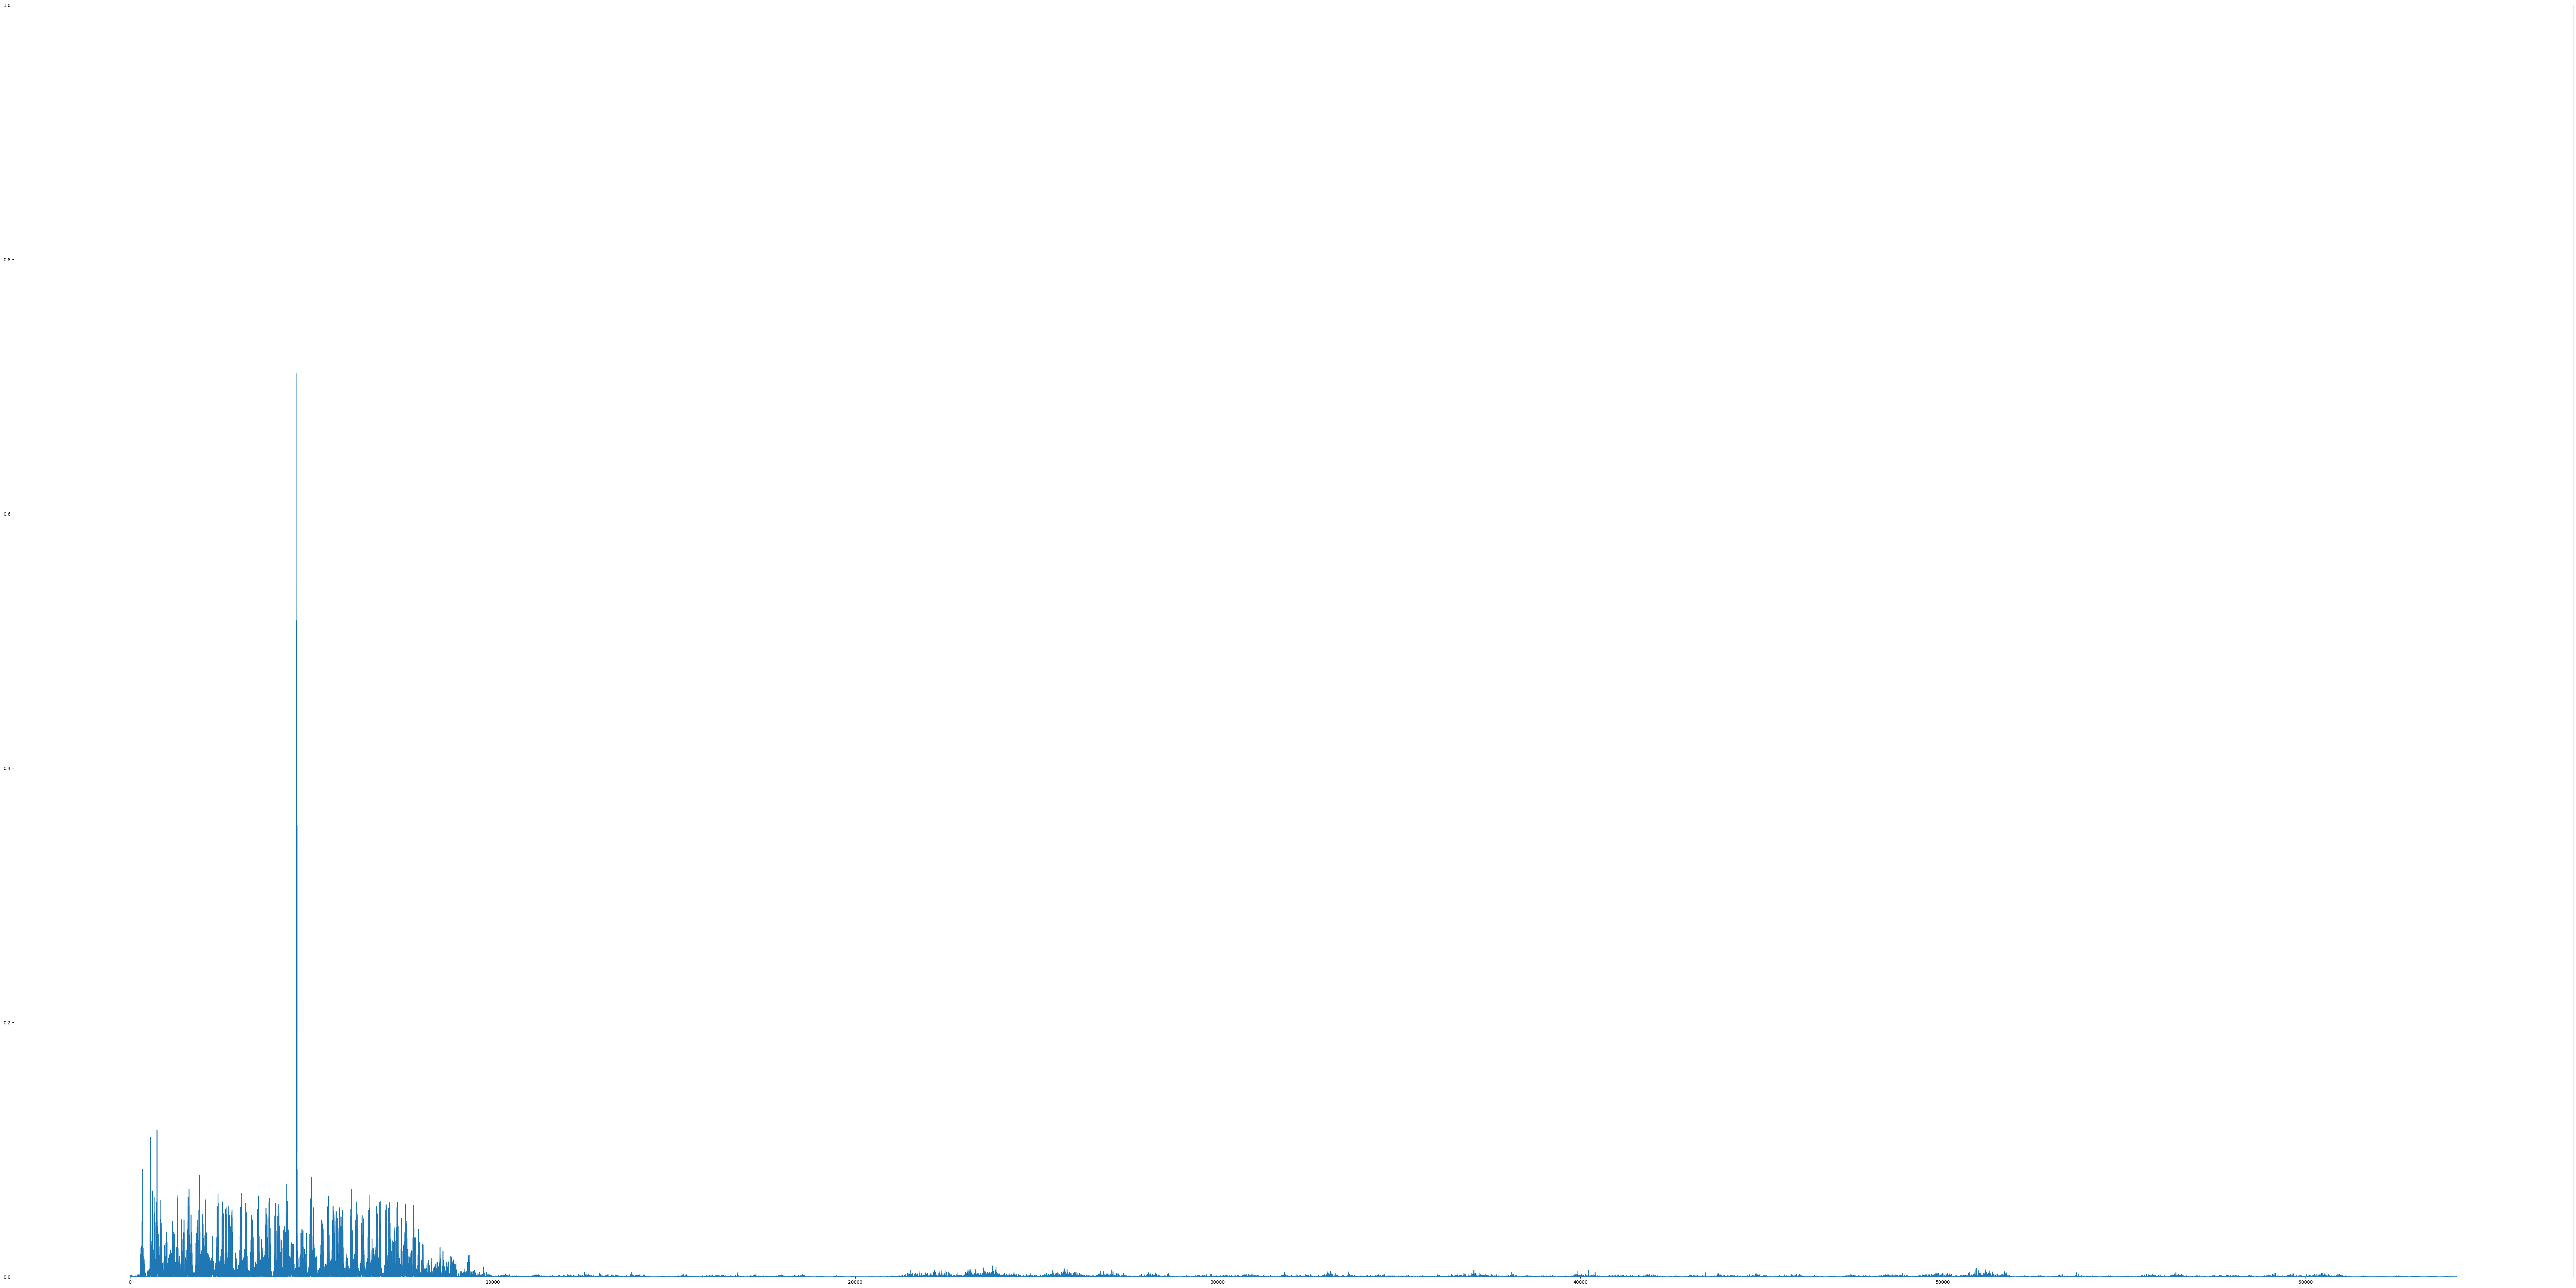

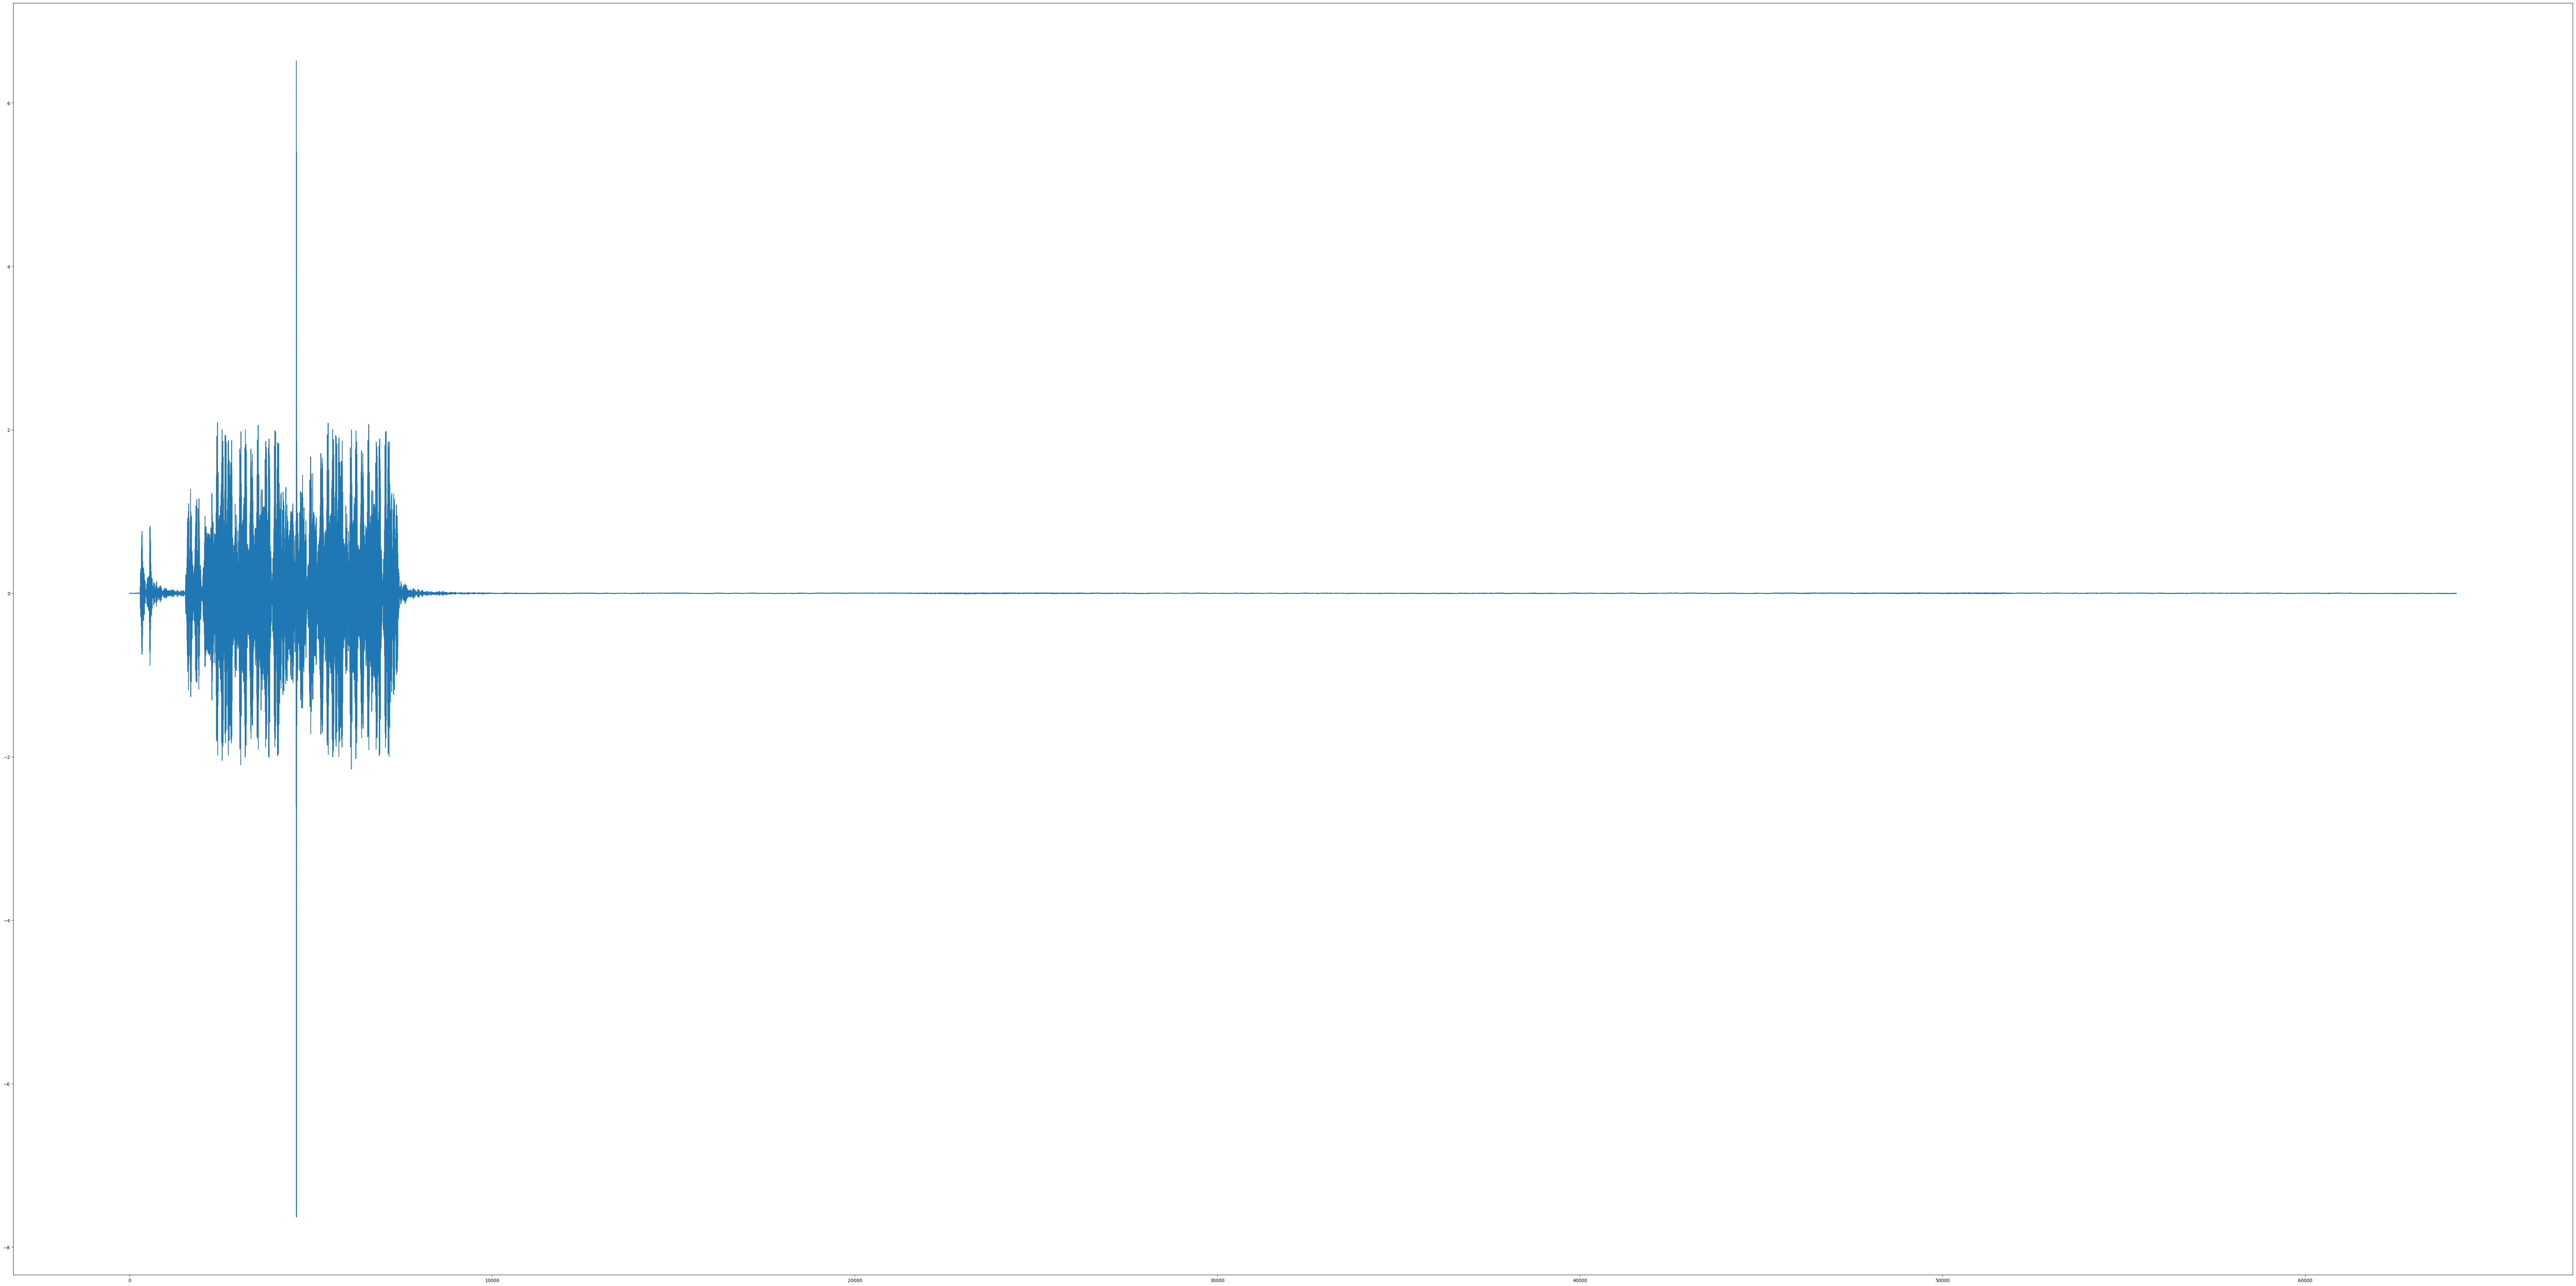

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

show_detail = 1
f = open("preamble.txt")
preamble = []
for line in f:
    for i in line.split(' '):
        if i != '':
            preamble.append(float(i))
f.close() 

preamble_len = len(preamble)

f = open("received.txt")
a = []
for line in f:
    for i in line.split(' '):
        if i != '':
            a.append(float(i))
f.close() 

mpl.rcParams['agg.path.chunksize'] = 10000

if show_detail:    
    plt.figure(figsize=(100,50))        
    plt.plot(a)    
    plt.show()

# if show_detail:    
#     plt.figure(figsize=(100,50))        
#     plt.plot(a[50000:51000])    
#     plt.show()

percent = []

points = []

max = 0
pos = 0

running_average = 0

max_avg = 0

val = []

for i in range(0,len(a)-preamble_len):
    res = np.dot(a[i:i+preamble_len],preamble)

    res_percent = res*res/(np.dot(preamble,preamble)*np.dot(a[i:i+preamble_len],a[i:i+preamble_len]))

    running_average += (res_percent-running_average)/(i+1)
    if running_average > max_avg:
        max_avg = running_average
    percent.append(res_percent)
    val.append(res)

    if((res_percent > running_average*3 and res_percent>0.2) and (res > max)):
        max = res
        pos = i
    if i > pos + 300 and max!=0:
        points.append(pos)
        max=0
        pos=0;
print(points)
if show_detail:    
    print(max_avg)
    plt.figure(figsize=(100,50))        
    plt.plot(percent)
    plt.ylim(0,1)
    plt.show()
        
    plt.figure(figsize=(100,50))        
    plt.plot(val)
    plt.show()

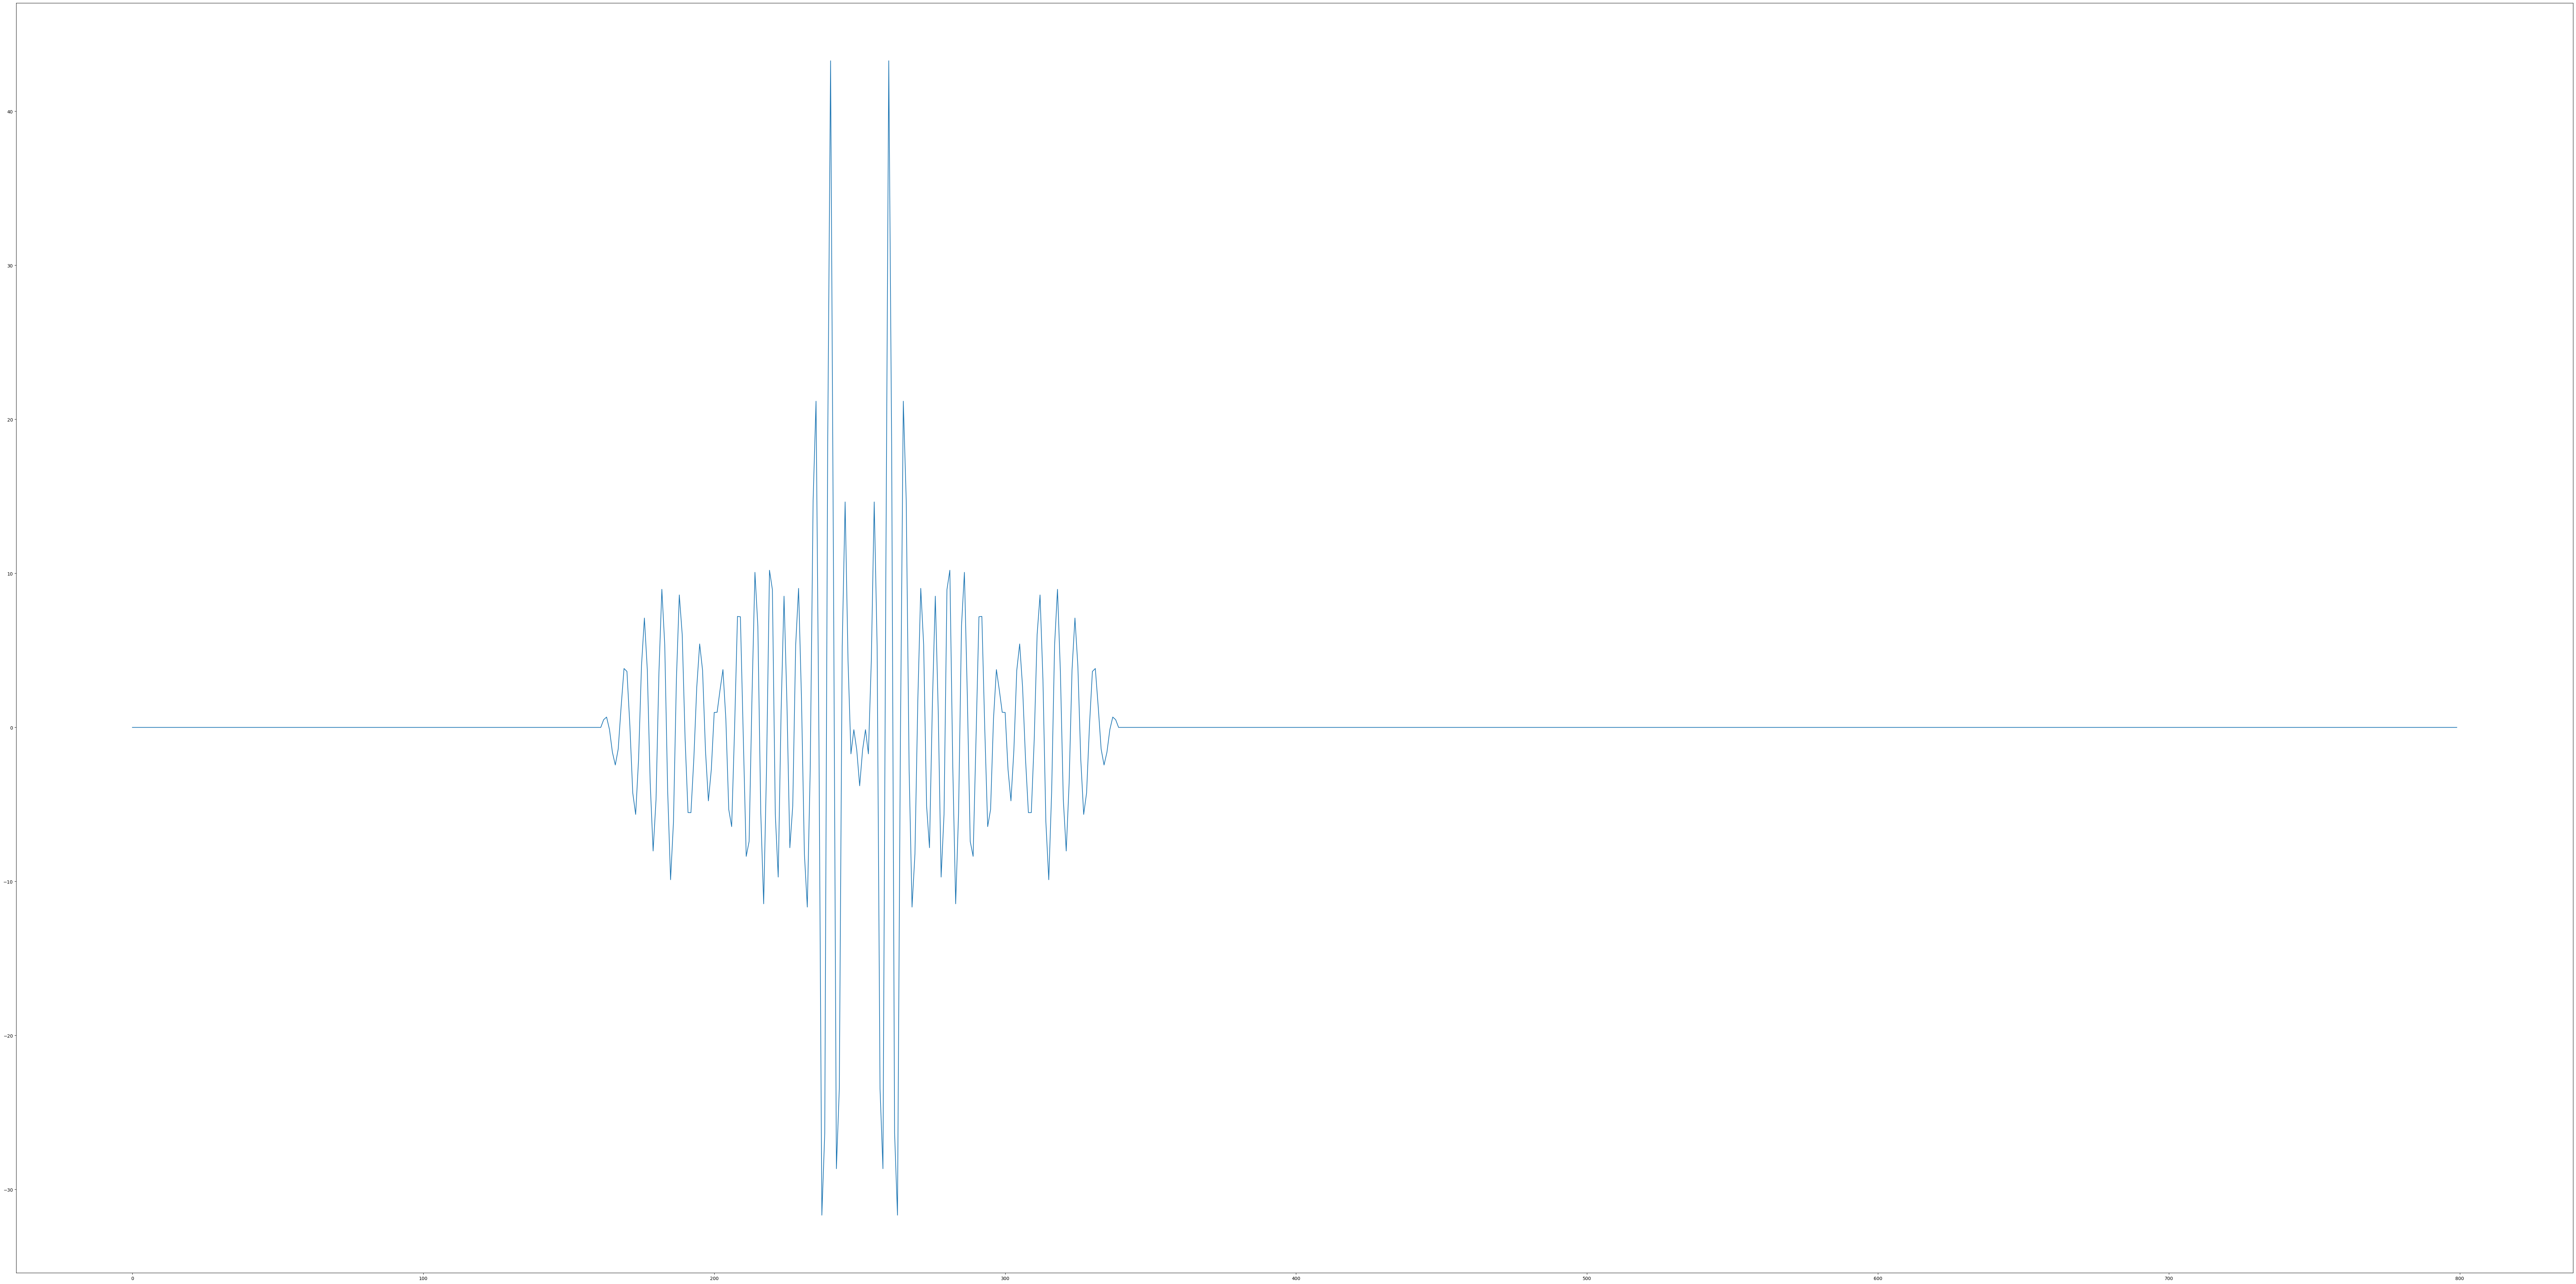

In [104]:
simu = [0 for i in range(800)]
print
for i in range(len(preamble)):
    simu[i+200] += preamble[i]
    simu[i+220] += preamble[i]

plt.figure(figsize=(100,50))
plt.plot(np.correlate(simu,preamble,mode='same'))

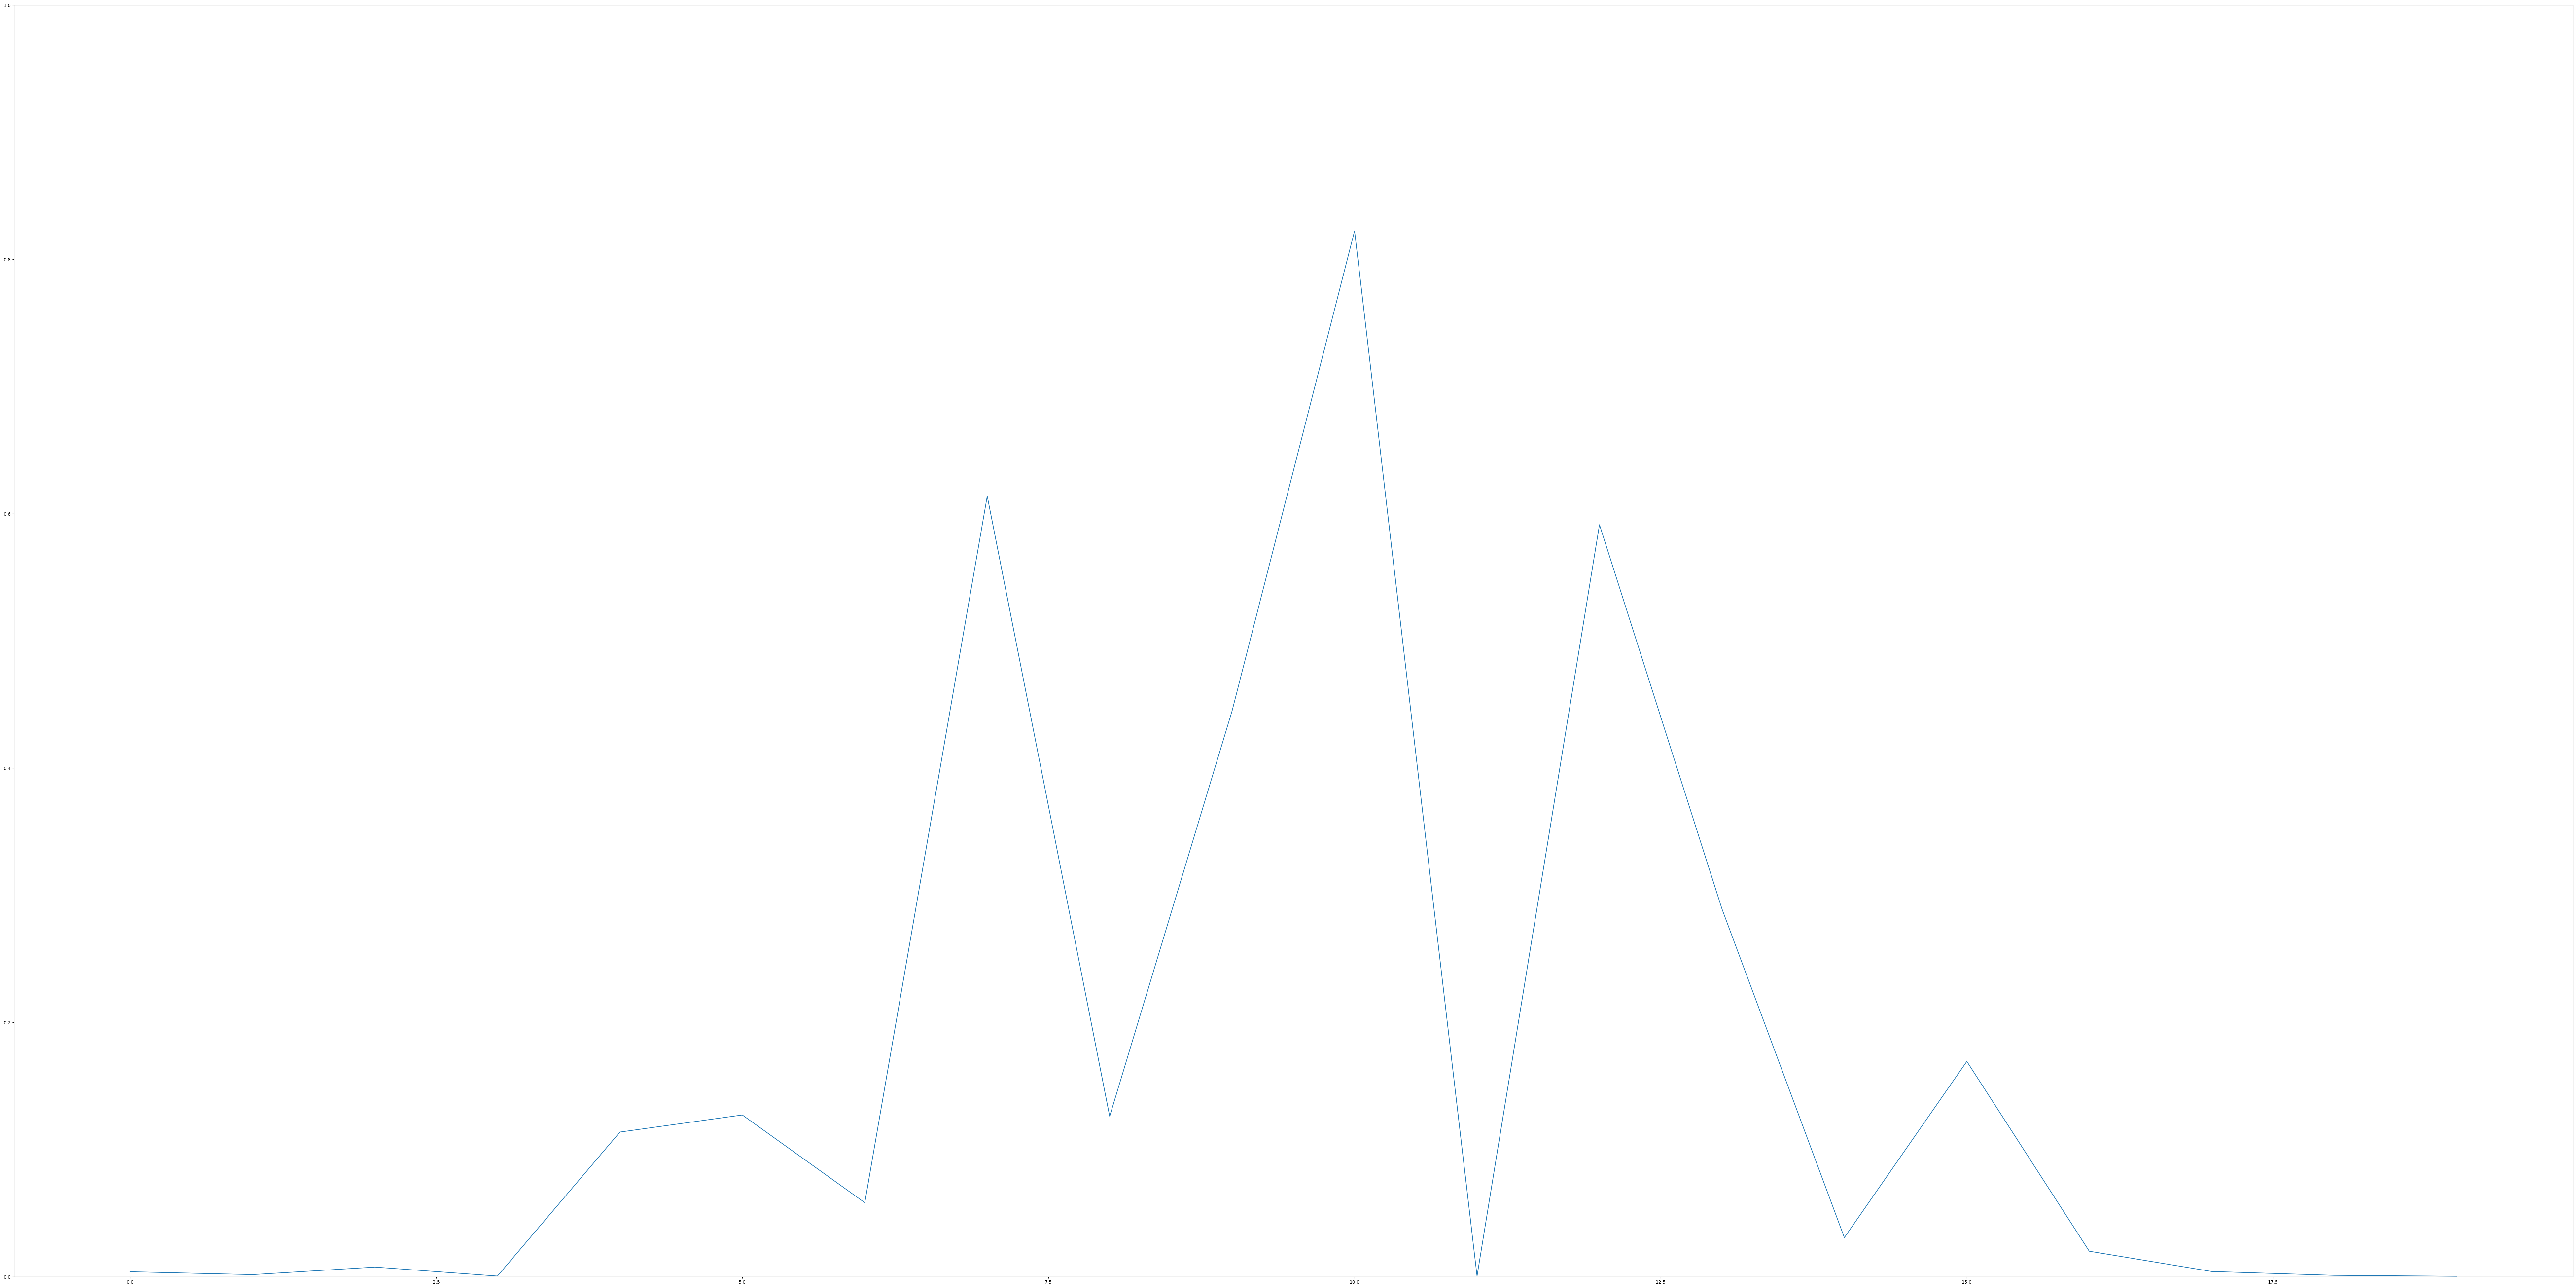

In [36]:
plt.figure(figsize=(100,50))        
plt.plot(percent[950:970])
plt.ylim(0,1)
plt.show()

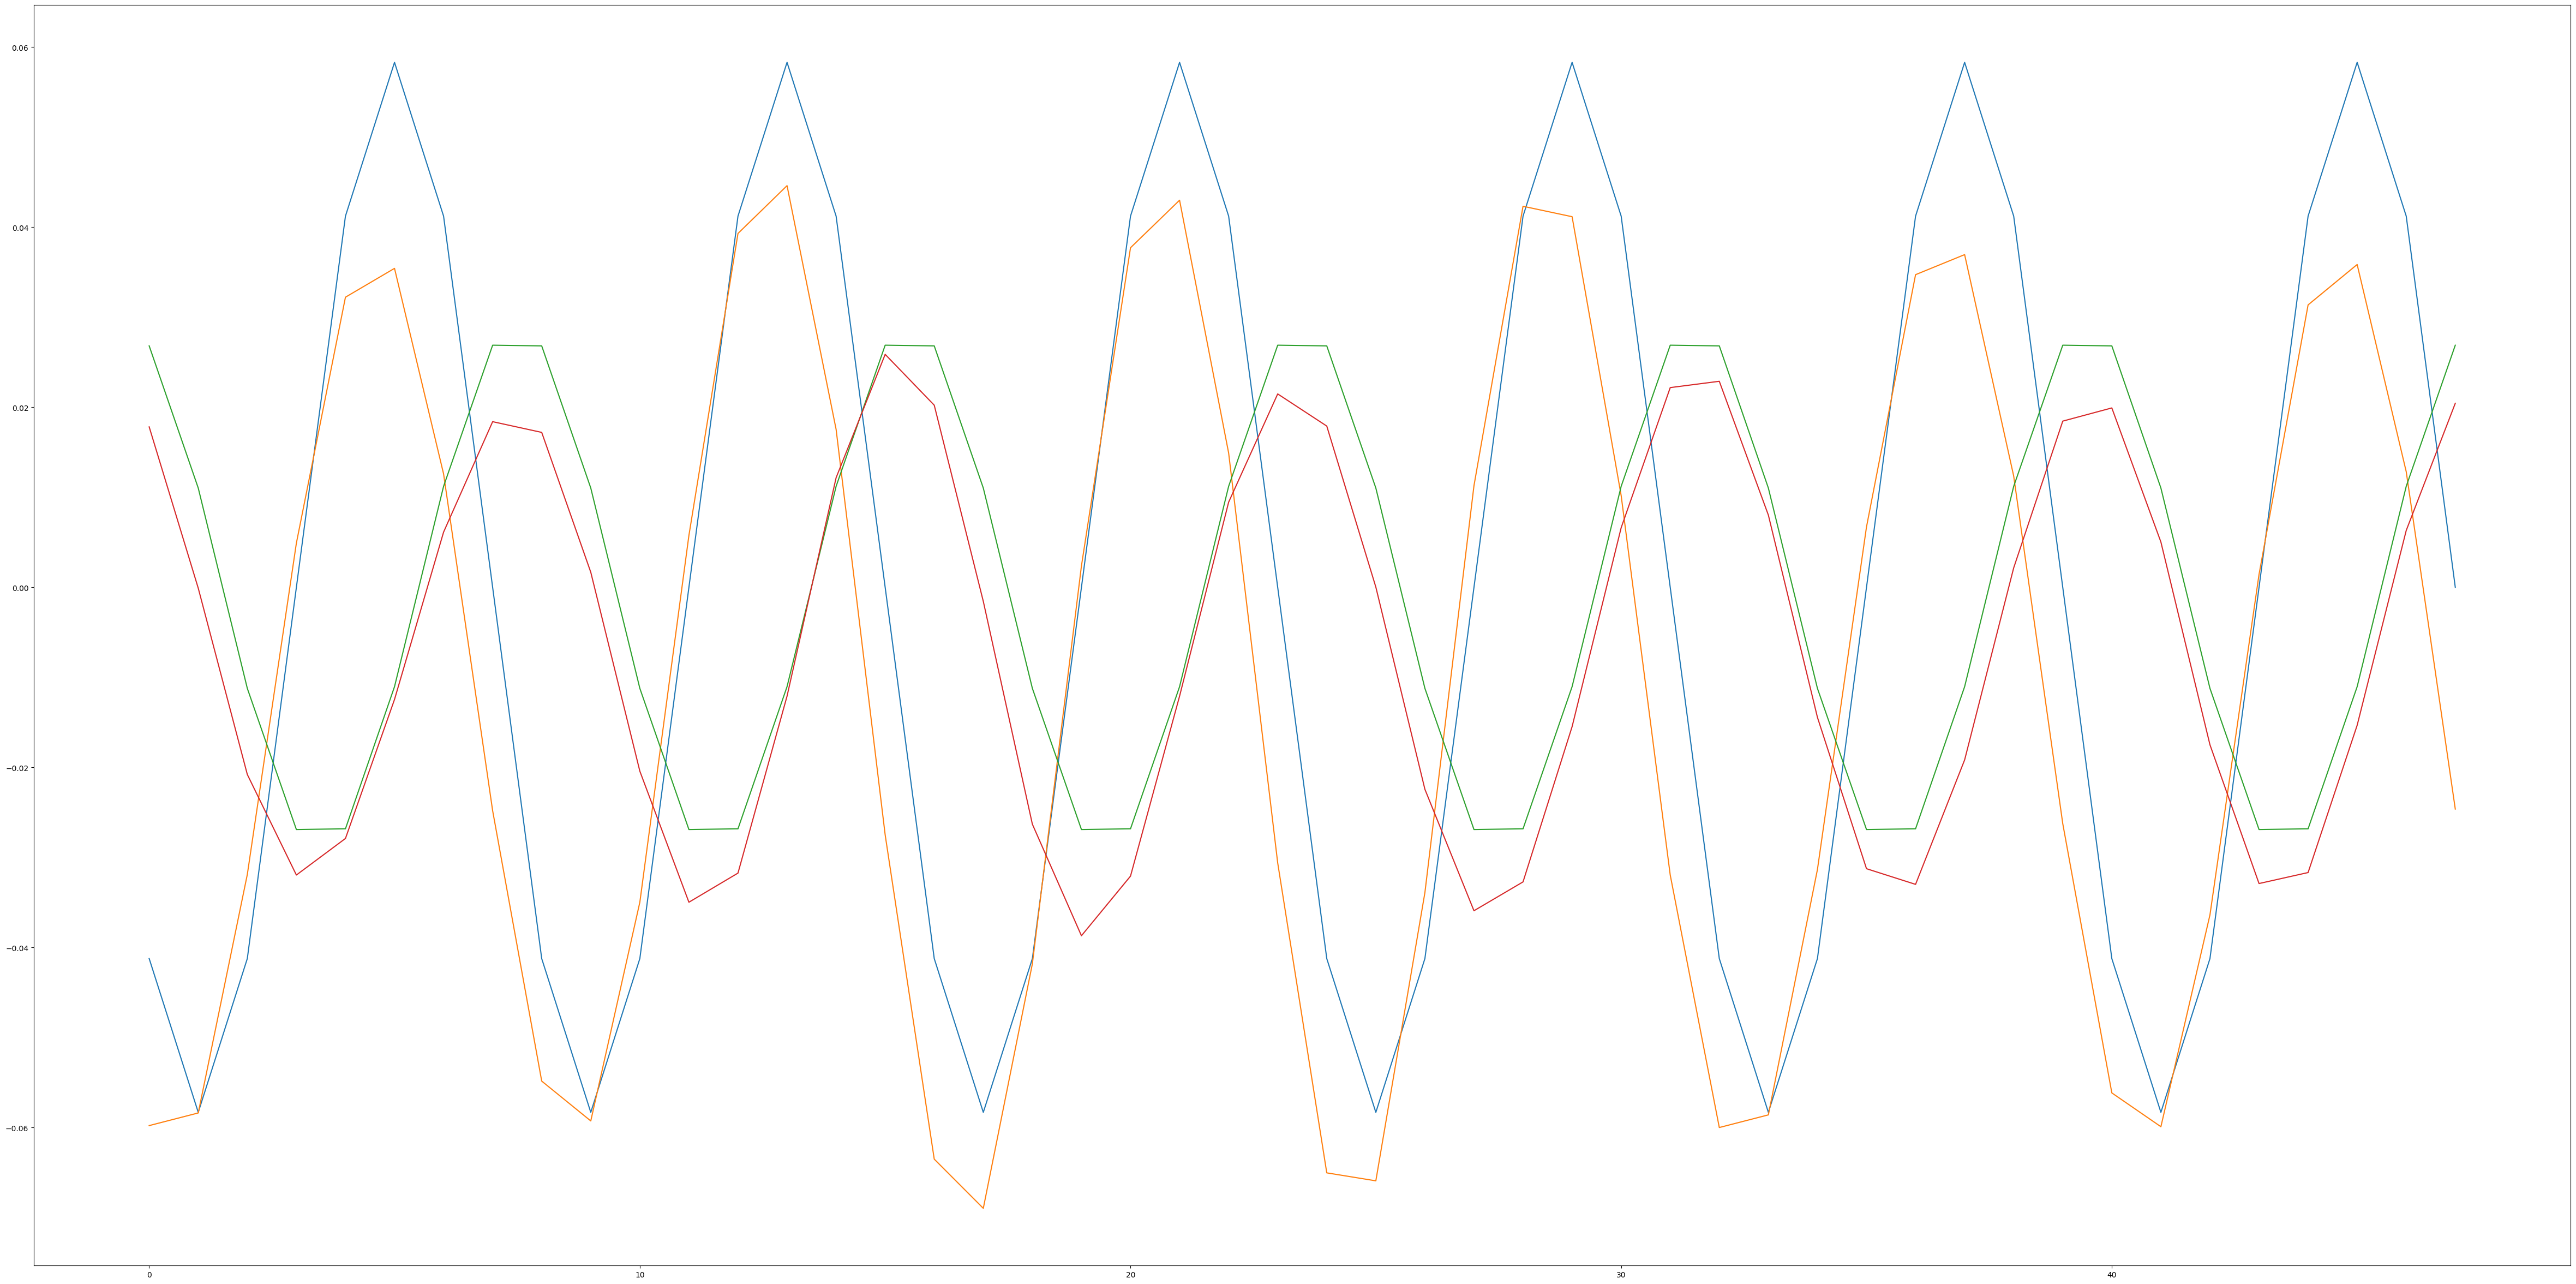

In [11]:
import numpy as np
import matplotlib.pyplot as plt

a=[-0.0412325, -0.0583116, -0.0412325, -9.45137e-17, 0.0412325, 0.0583116, 0.0412325, 7.14598e-18, -0.0412325, -0.0583116, -0.0412325, -1.42871e-17, 0.0412325, 0.0583116, 0.0412325, 2.14282e-17, -0.0412325, -0.0583116, -0.0412325, -2.85693e-17, 0.0412325, 0.0583116, 0.0412325, -1.61512e-17, -0.0412325, -0.0583116, -0.0412325, -4.29926e-17, 0.0412325, 0.0583116, 0.0412325, 4.98516e-17, -0.0412325, -0.0583116, -0.0412325, -5.72748e-17, 0.0412325, 0.0583116, 0.0412325, 1.67857e-16, -0.0412325, -0.0583116, -0.0412325, -7.12749e-17, 0.0412325, 0.0583116, 0.0412325, 7.86982e-17,]

b=[-0.0597839, -0.0583801, -0.0318909, 0.00491333, 0.0322266, 0.0354309, 0.0126038, -0.0248108, -0.0548401, -0.0592651, -0.0349731, 0.00576782, 0.0393066, 0.0446167, 0.0175476, -0.0274963, -0.0635071, -0.0689697, -0.0418091, 0.00238037, 0.0377197, 0.0429993, 0.0149231, -0.0306091, -0.065033, -0.065918, -0.033905, 0.0112915, 0.0423279, 0.0411682, 0.0101929, -0.0319519, -0.0599976, -0.0585938, -0.0313416, 0.00671387, 0.034729, 0.0369568, 0.0123596, -0.0262451, -0.0561523, -0.059906, -0.036377, 0.00143433, 0.0313721, 0.0358582, 0.0128479, -0.0246277, ]

c=[0.0268195, 0.0110308, -0.0112196, -0.0268977, -0.0268195, -0.0110308, 0.0112196, 0.0268977, 0.0268195, 0.0110308, -0.0112196, -0.0268977, -0.0268195, -0.0110308, 0.0112196, 0.0268977, 0.0268195, 0.0110308, -0.0112196, -0.0268977, -0.0268195, -0.0110308, 0.0112196, 0.0268977, 0.0268195, 0.0110308, -0.0112196, -0.0268977, -0.0268195, -0.0110308, 0.0112196, 0.0268977, 0.0268195, 0.0110308, -0.0112196, -0.0268977, -0.0268195, -0.0110308, 0.0112196, 0.0268977, 0.0268195, 0.0110308, -0.0112196, -0.0268977, -0.0268195, -0.0110308, 0.0112196, 0.0268977,]

d= [0.0178223, -9.15527e-05, -0.0207825, -0.0319519, -0.0278931, -0.0124512, 0.00613403, 0.0184021, 0.0172119, 0.00167847, -0.0204163, -0.0349731, -0.0317383, -0.012085, 0.0121765, 0.0258789, 0.0202332, -0.0015564, -0.0263062, -0.0386963, -0.032074, -0.012085, 0.00946045, 0.0214844, 0.0179138, 3.05176e-05, -0.0224304, -0.0359192, -0.0327148, -0.0154724, 0.00662231, 0.0221863, 0.0228882, 0.00802612, -0.0144348, -0.03125, -0.0329895, -0.019165, 0.00216675, 0.0184631, 0.019928, 0.0050354, -0.0174866, -0.0328979, -0.0316772, -0.0153198, 0.00631714, 0.0204468, ]
plt.figure(figsize=(60,30))
plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.plot(d)
plt.show()

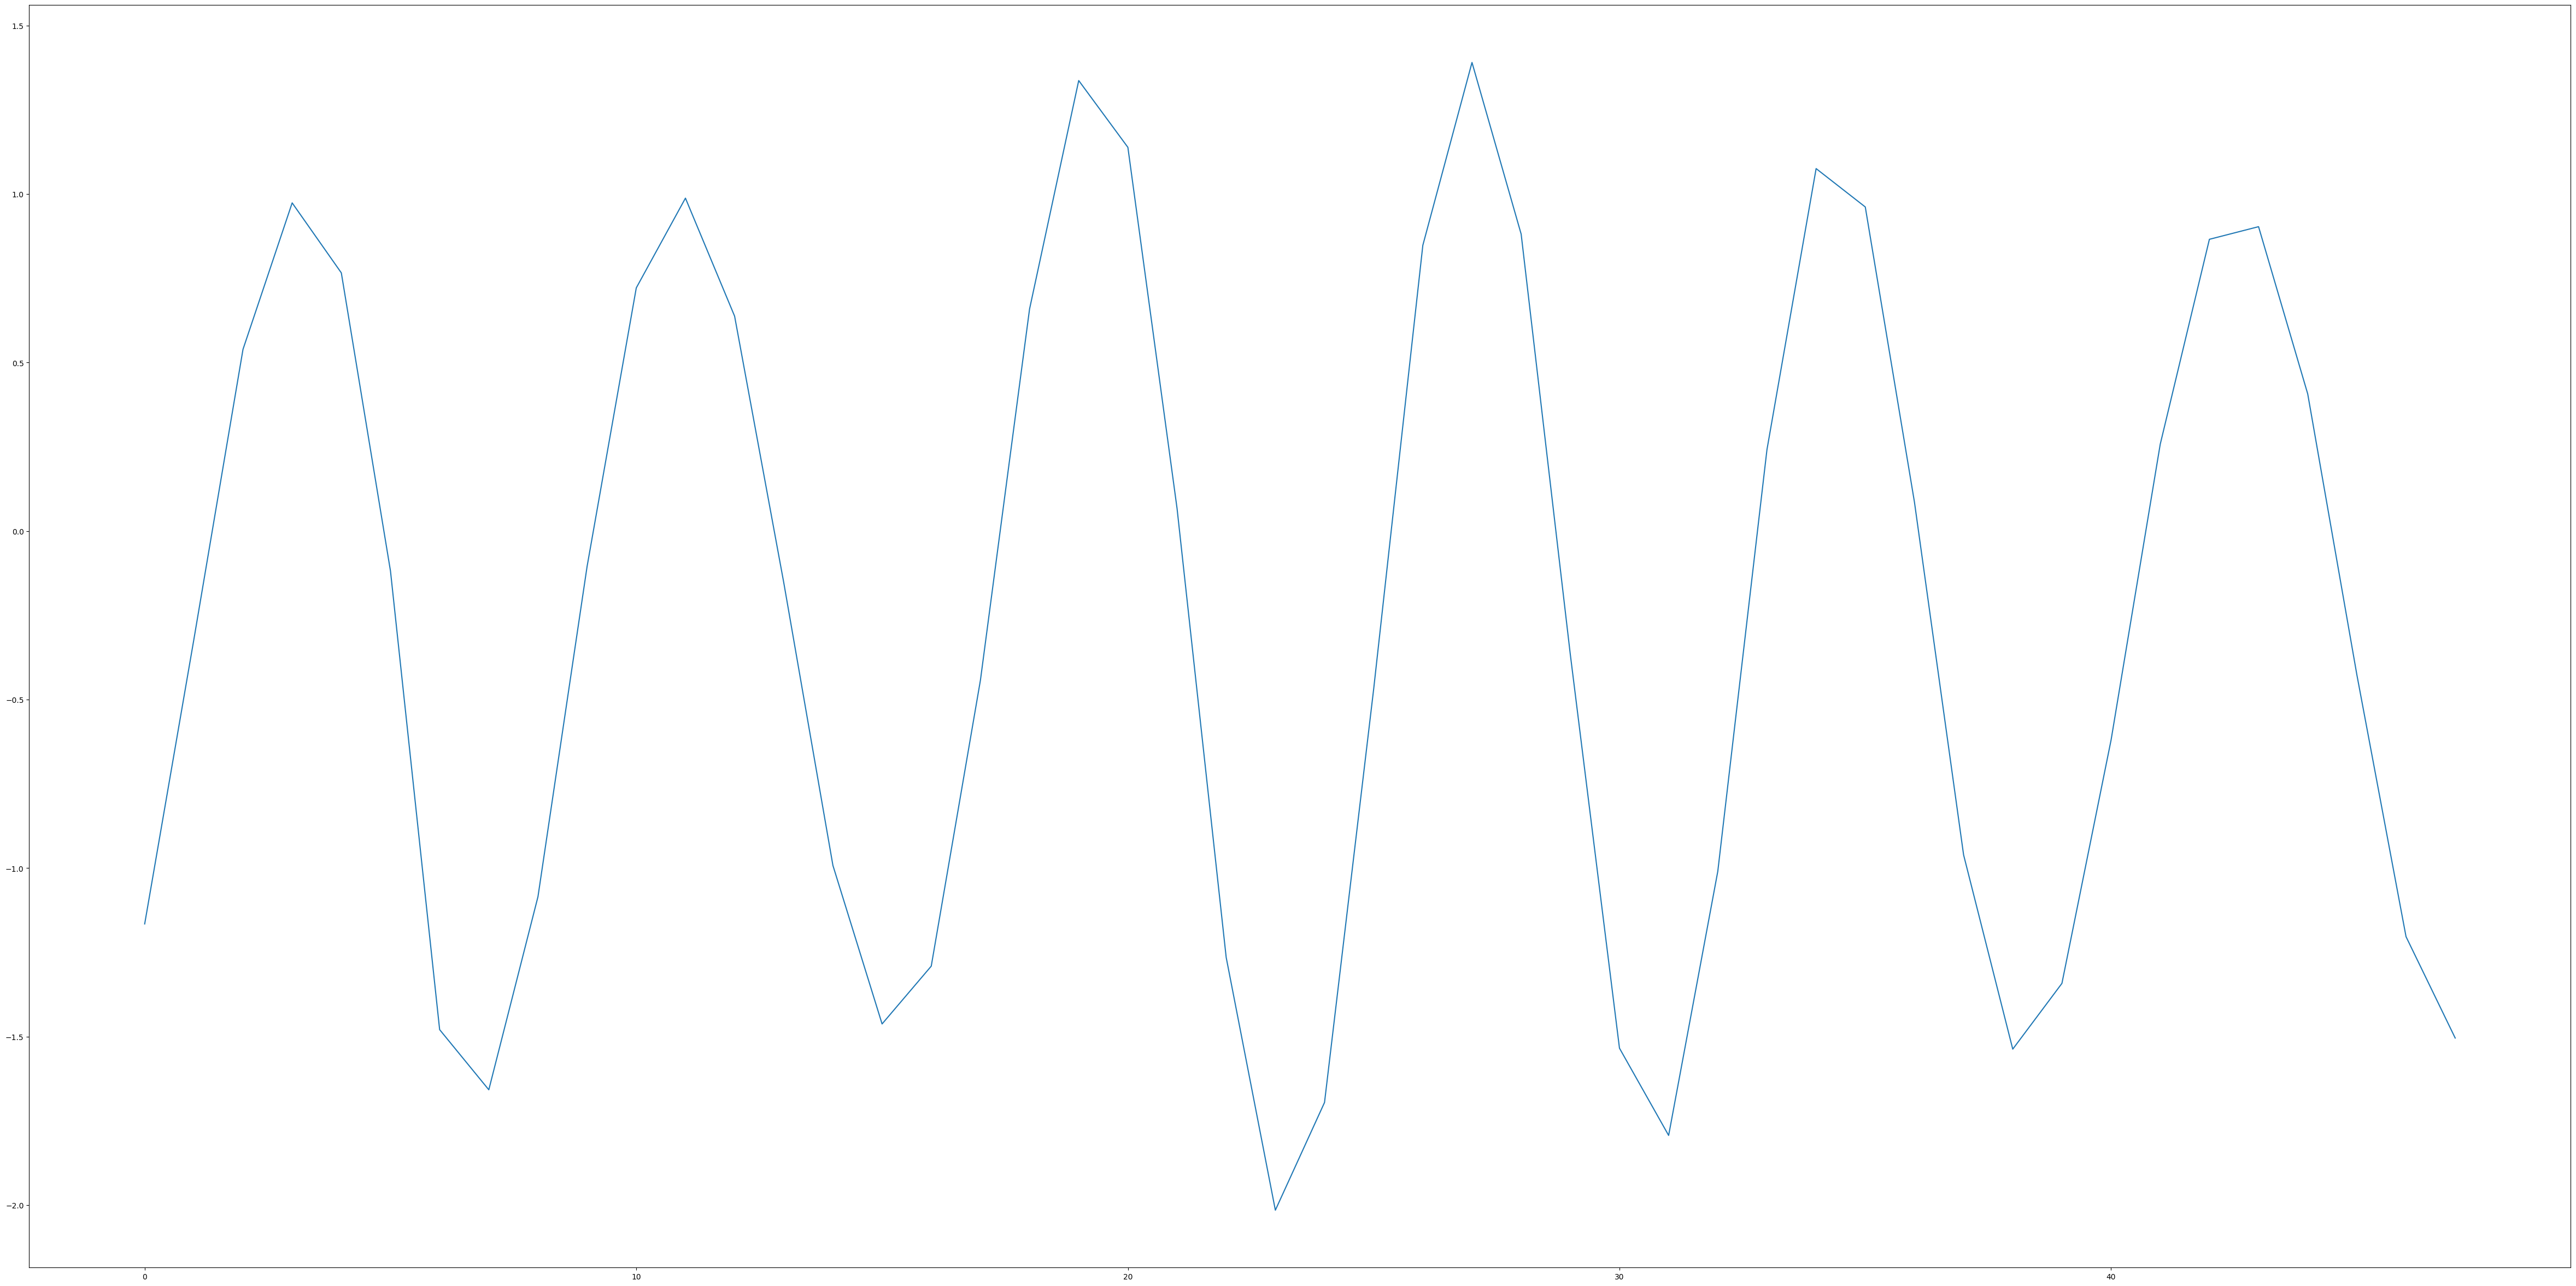

In [12]:
z1 = [
    -1.1655, -0.321992, 0.539202, 0.973641, 0.766015, -0.118564, -1.47915, -1.6575, -1.08485, -0.104371, 0.721442, 0.987673, 0.637574, -0.152983, -0.992077, -1.46221, -1.29079, -0.442979, 0.658781, 1.33655, 1.13841, 0.0674666, -1.26505, -2.01475, -1.69522, -0.468464, 0.847921, 1.39023, 0.880928, -0.366309, -1.53419, -1.79292, -1.00943, 0.241532, 1.07535, 0.961532, 0.0861228, -0.960702, -1.53699, -1.34191, -0.619945, 0.257664, 0.865562, 0.903022, 0.406929, -0.426526, -1.20336, -1.50406,
]
plt.figure(figsize=(60,30))
plt.plot(z1)
plt.show()

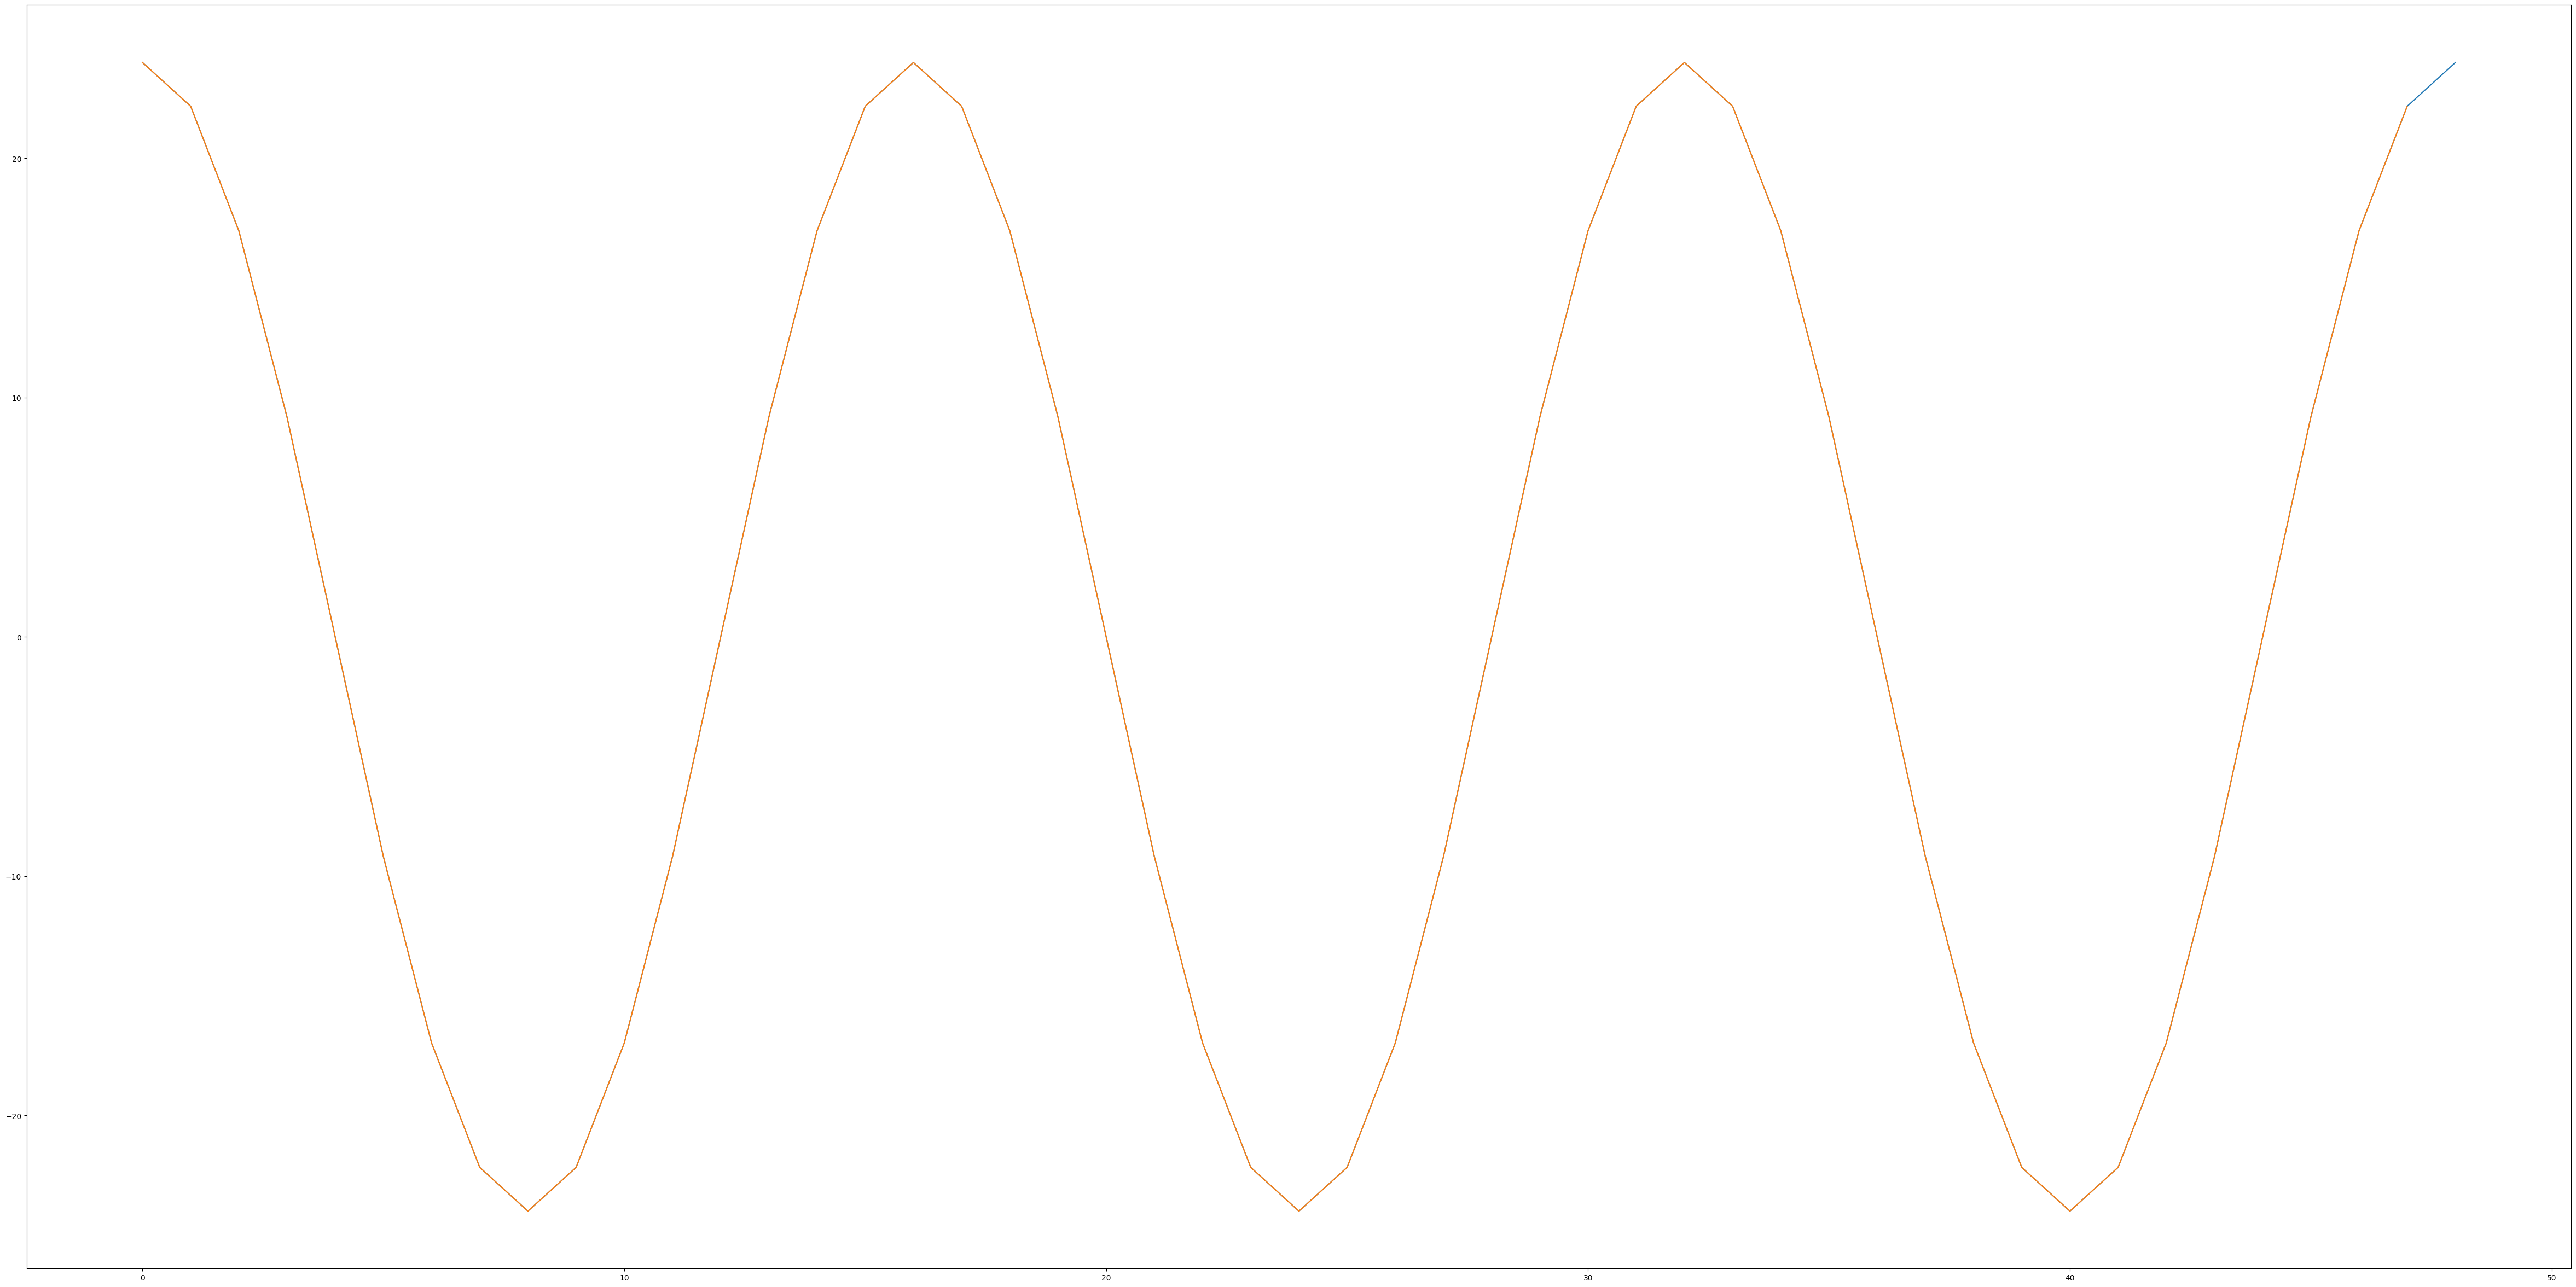

In [16]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,48)/48000
x = np.cos(3000*2*np.pi*t)
sig = np.concatenate([x,x])

plt.figure(figsize=(60,30))
plt.plot(np.correlate(sig,x))
plt.plot(x*24)
plt.show()

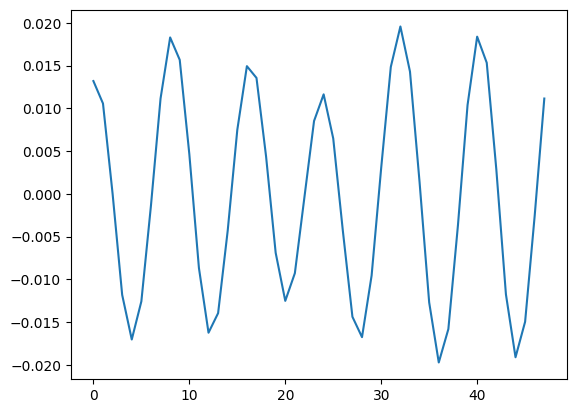

In [28]:
import numpy as np
import matplotlib.pyplot as plt

a=[0.0131836, 0.0105591, 3.05176e-05, -0.0118103, -0.0170288, -0.0125732, -0.00137329, 0.0111389, 0.01828, 0.0156555, 0.00463867, -0.00866699, -0.0162354, -0.0139465, -0.00430298, 0.00747681, 0.0149231, 0.0135498, 0.00436401, -0.00689697, -0.0125122, -0.00927734, -0.000366211, 0.0085144, 0.0116272, 0.00646973, -0.00430298, -0.0143738, -0.0167542, -0.009552, 0.00305176, 0.0148315, 0.0195618, 0.0142822, 0.00134277, -0.0126953, -0.0197144, -0.0158081, -0.00366211, 0.010376, 0.0183716, 0.0153198, 0.00283813, -0.0117493, -0.019104, -0.0149536, -0.00253296, 0.0111389,]

plt.plot(a)